# Dense Neural Network Regression Example: Air Quality Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

2025-06-22 17:27:02.582015: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the Dataset

Data source: https://archive.ics.uci.edu/dataset/360/air+quality

In [2]:
df = pd.read_csv("./Data/AirQualityUCI.csv", sep=';', decimal=',')

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## Data Preprocessing

- Remove columns with too many missing values
- Drop non-numeric columns
- Fill or drop missing values
- Select a target variable (e.g., 'C6H6(GT)')

In [5]:
# Drop last two columns (unnamed, empty)
df = df.iloc[:, :-2]

# Drop rows with missing values
df = df.replace(-200, np.nan)
df = df.dropna()

# Drop non-numeric columns
df = df.select_dtypes(include=[np.number])

In [6]:
# Select features and target
target = 'C6H6(GT)'
X = df.drop(columns=[target])
y = df[target]

## Train-Test Split and Scaling

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build the Dense Neural Network Model

In [8]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

/opt/conda/envs/py39_tensorflow/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

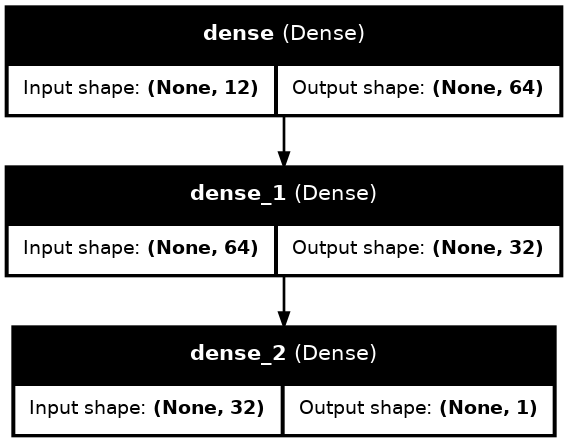

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, rankdir="TB", dpi=96)

## Train the Model

In [9]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 165.7023 - mae: 10.3862 - val_loss: 129.2351 - val_mae: 9.3335
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 147.4231 - mae: 9.6687 - val_loss: 99.4809 - val_mae: 8.2088
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 103.4172 - mae: 8.2606 - val_loss: 57.4520 - val_mae: 6.4951
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 51.1195 - mae: 6.0760 - val_loss: 19.6867 - val_mae: 3.9477
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.7755 - mae: 3.4762 - val_loss: 12.0059 - val_mae: 2.9247
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.2487 - mae: 2.6693 - val_loss: 9.9095 - val_mae: 2.6330
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.5148 - mae: 2.5185 - val_loss: 8.0634 - val_mae: 2.3440
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.7133 - mae: 2.2661 - val_loss: 6.6673 - val_mae: 2.1110
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/ste

## Evaluate the Model

In [10]:
y_pred = model.predict(X_test_scaled).flatten()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

MSE: 0.39
R2 Score: 0.99


## Plot Training History

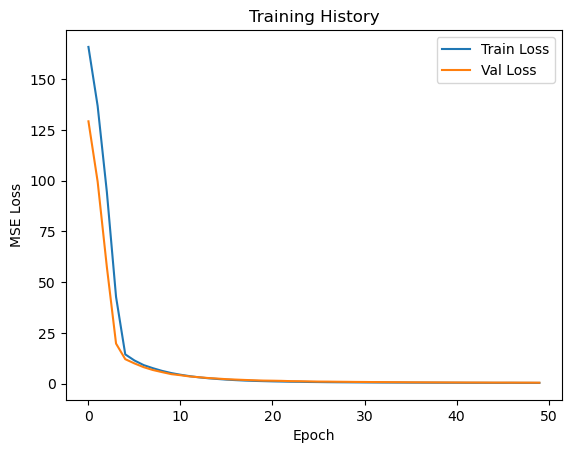

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training History')
plt.show()